In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func


In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june = session.query(Measurement.date,Measurement.tobs).\
    filter(extract("month", Measurement.date)==6).all()

In [5]:
#  3. Convert the June temperatures to a list.
temps = list(np.ravel(june))

In [22]:
df = pd.DataFrame(temps)
# Sort the dataframe by date

In [23]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
temps_df = pd.DataFrame(june, columns = ["Date", "Temperature"])

In [25]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
temps_df["Temperature"].describe()

count    1700.000000
mean       74.944118
std         3.257417
min        64.000000
25%        73.000000
50%        75.000000
75%        77.000000
max        85.000000
Name: Temperature, dtype: float64

In [27]:
temps_df.dtypes

Date            object
Temperature    float64
dtype: object

In [28]:
temps_df["Date"] = pd.to_datetime(temps_df["Date"])

In [35]:
temps_df

,Date,Temperature
0,2010-06-01,78.0
1,2010-06-02,76.0
2,2010-06-03,78.0
3,2010-06-04,76.0
4,2010-06-05,77.0
...,...,...
1695,2017-06-26,79.0
1696,2017-06-27,74.0
1697,2017-06-28,74.0
1698,2017-06-29,76.0


(14610.0, 17532.0)

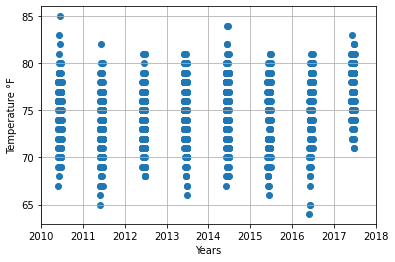

In [43]:
plt.scatter(x = temps_df["Date"], y = temps_df["Temperature"])
plt.grid()
plt.ylabel("Temperature °F")
plt.xlabel("Years")
plt.xlim(pd.to_datetime("2010-01-01"), pd.to_datetime("2018-01-01"))

## D2: Determine the Summary Statistics for December

In [9]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
december = session.query(Measurement.date,Measurement.tobs).\
    filter(extract("month", Measurement.date)==12).all()

In [10]:
date = session.query(Measurement.date).\
    filter(extract("month", Measurement.date)==12).all()

In [11]:
# 7. Convert the December temperatures to a list.
december_list = np.ravel(december)

In [12]:
december_df = pd.DataFrame(december, columns = ["Date", "Temperature"])

In [ ]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
december_df = pd.DataFrame(december_list, columns = ["date, temperature"])

In [13]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
december_df.describe()

,Temperature
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [ ]:
december_df["Date"] = pd.to_datetime(december_df["Date"])

(14610.0, 17532.0)

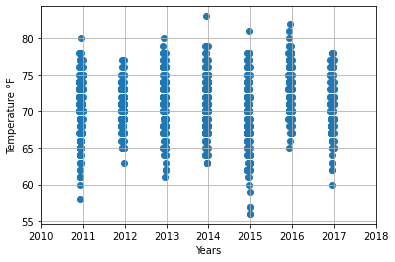

In [44]:

plt.scatter(x = december_df["Date"], y = december_df["Temperature"])
plt.grid()
plt.ylabel("Temperature °F")
plt.xlabel("Years")
plt.xlim(pd.to_datetime("2010-01-01"), pd.to_datetime("2018-01-01"))
